In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv("cleaned_5yr_stock_data_with_month.csv", parse_dates=["Month"])
df.head()

,Date,Open,High,Low,Close,Volume,Ticker,momentum_rsi,trend_macd,volatility_bbm,trend_ema_fast,Daily_Return,Month
0,2019-02-07,41.07,41.43,40.58,40.72,126966800,AAPL,66.47,1.08,38.04,39.48,NaN,2019-02-01
1,2019-02-08,40.43,40.83,40.29,40.77,95280000,AAPL,66.69,1.10,38.25,39.67,0.12,2019-02-01
2,2019-02-11,40.92,40.96,40.49,40.53,83973600,AAPL,64.44,1.09,38.46,39.81,-0.58,2019-02-01
3,2019-02-12,40.69,40.91,40.60,40.88,89134000,AAPL,66.27,1.09,38.72,39.97,0.86,2019-02-01
4,2019-02-13,41.00,41.26,40.65,40.71,89960800,AAPL,64.53,1.07,38.93,40.09,-0.42,2019-02-01


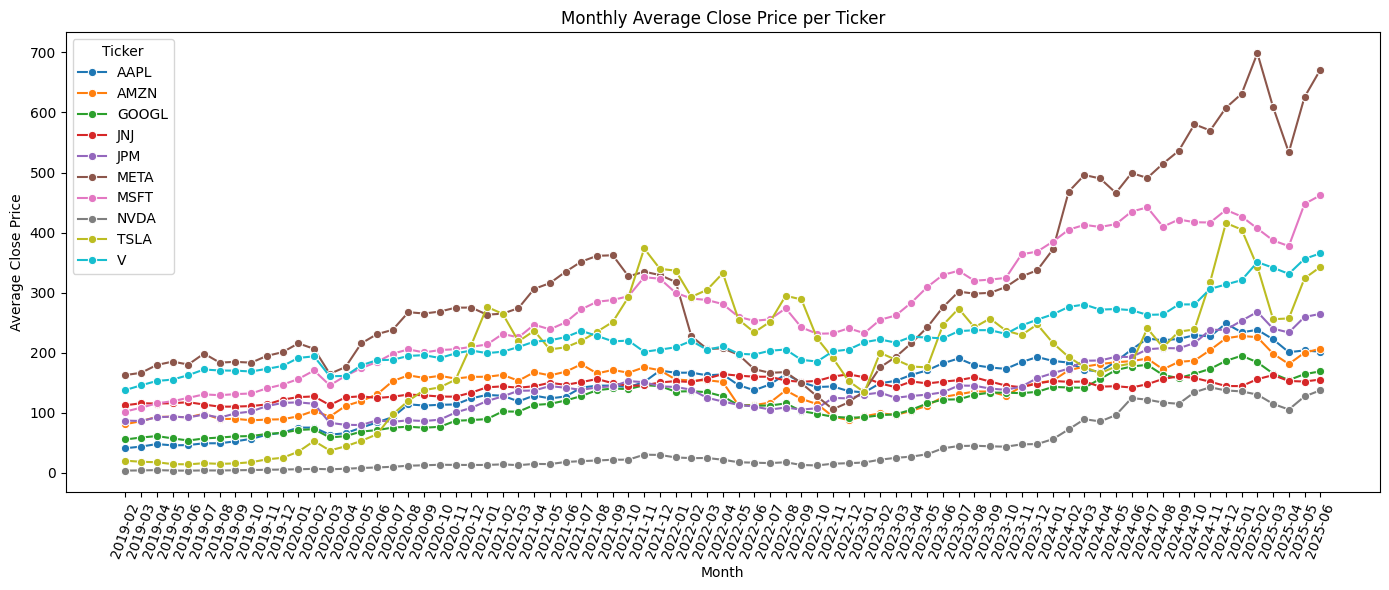

In [10]:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M').astype(str)
monthly_avg = df.groupby(['Month', 'Ticker'])['Close'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Close', hue='Ticker', marker='o')
plt.xticks(rotation=70)
plt.title("Monthly Average Close Price per Ticker")
plt.ylabel("Average Close Price")
plt.tight_layout()
plt.show()

/var/folders/j1/p1xq9vpd7jv27gxx2nvhyh380000gn/T/ipykernel_2975/4172104389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Ticker', y='Daily_Return', palette="Set3")


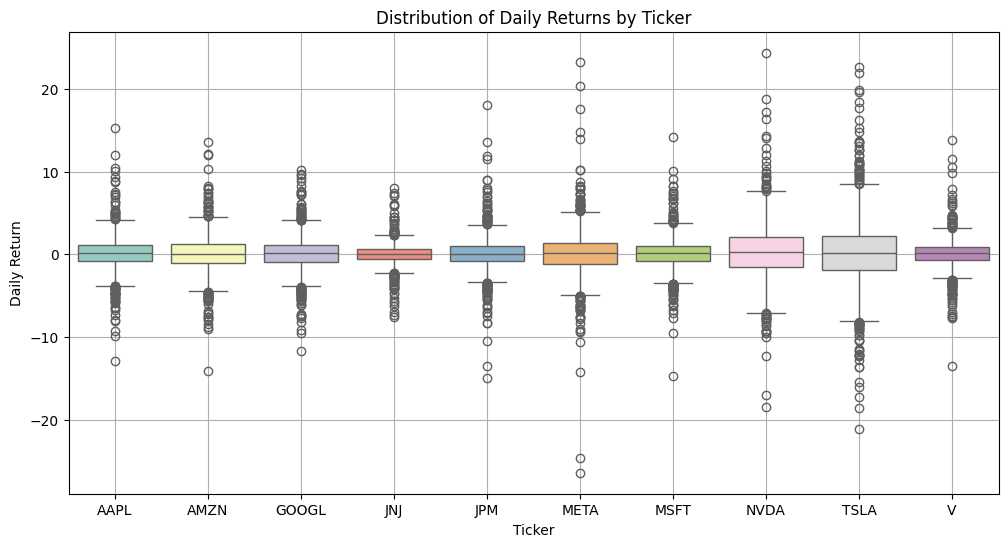

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Ticker', y='Daily_Return', palette="Set3")
plt.title("Distribution of Daily Returns by Ticker")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()


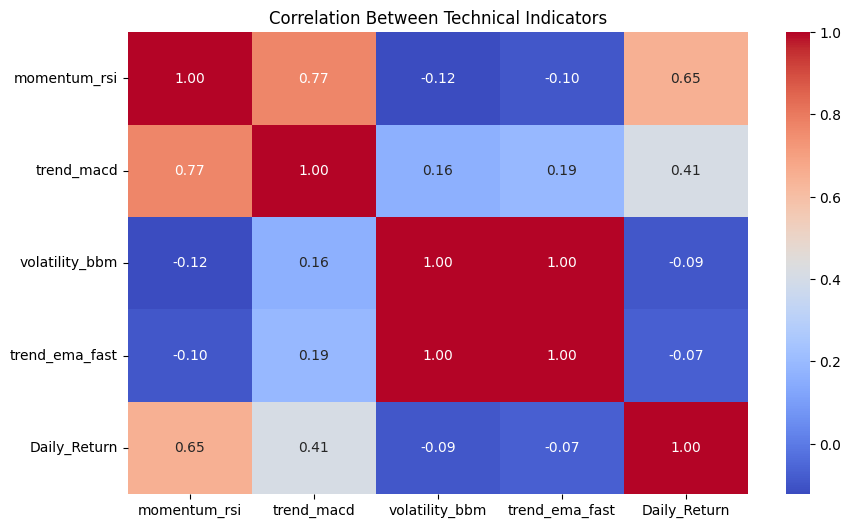

In [14]:
import numpy as np

# Take mean of indicators per month
monthly_metrics = df.groupby('Month')[['momentum_rsi', 'trend_macd', 'volatility_bbm', 'trend_ema_fast', 'Daily_Return']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(monthly_metrics.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Technical Indicators")
plt.show()


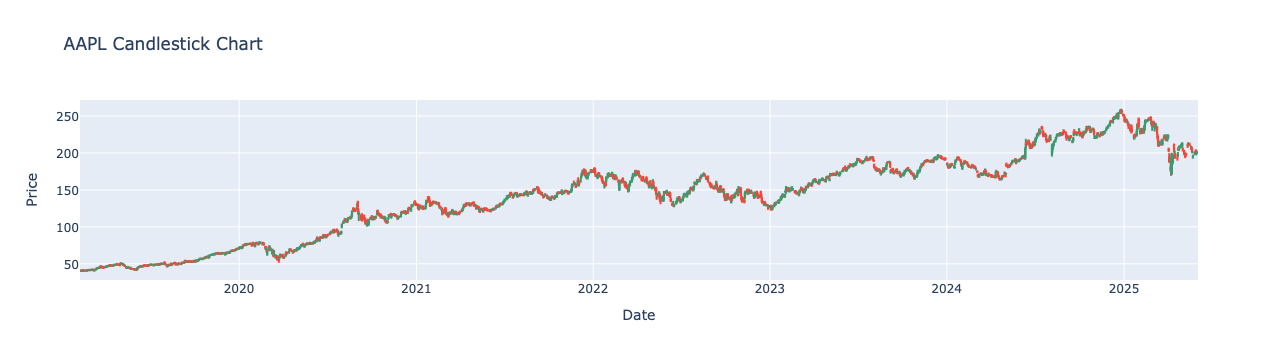

In [15]:
import plotly.graph_objects as go

ticker = 'AAPL'  # Change to any ticker
candlestick_df = df[df['Ticker'] == ticker].copy()

fig = go.Figure(data=[go.Candlestick(x=candlestick_df['Date'],
                open=candlestick_df['Open'],
                high=candlestick_df['High'],
                low=candlestick_df['Low'],
                close=candlestick_df['Close'])])
fig.update_layout(title=f'{ticker} Candlestick Chart',
                  xaxis_title='Date', yaxis_title='Price',
                  xaxis_rangeslider_visible=False)
fig.show()


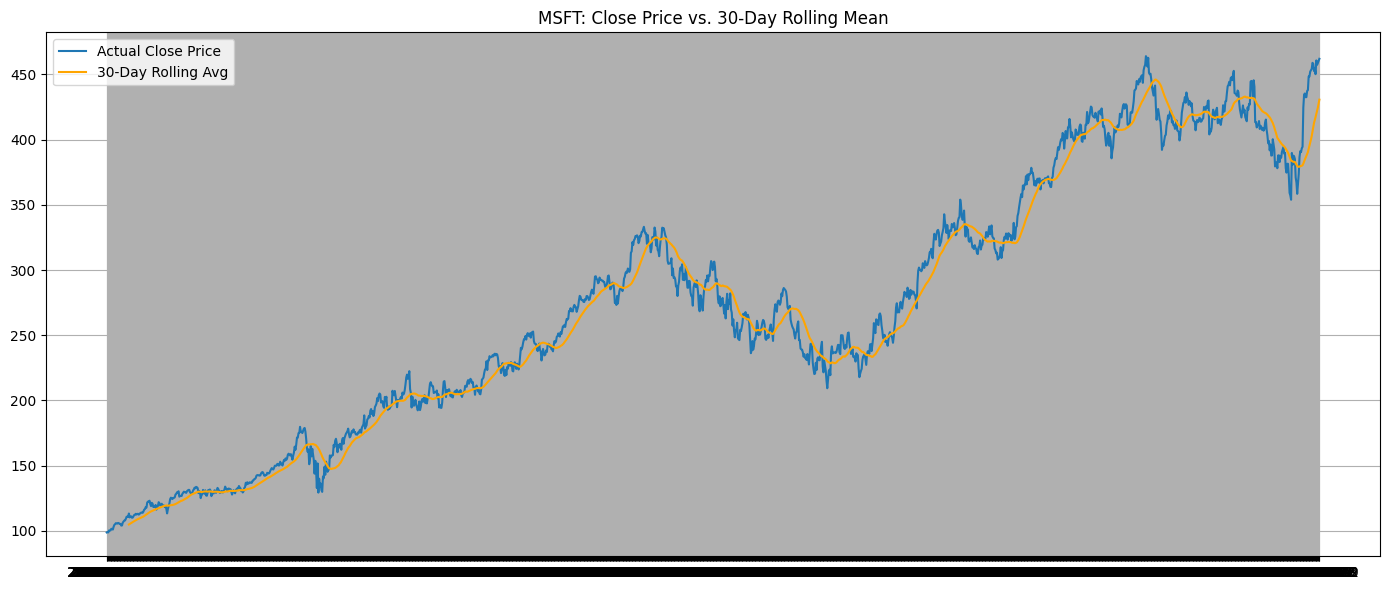

In [16]:
ticker = 'MSFT'
df_msft = df[df['Ticker'] == ticker].copy()
df_msft['rolling_mean_30'] = df_msft['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(df_msft['Date'], df_msft['Close'], label='Actual Close Price')
plt.plot(df_msft['Date'], df_msft['rolling_mean_30'], label='30-Day Rolling Avg', color='orange')
plt.title(f"{ticker}: Close Price vs. 30-Day Rolling Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


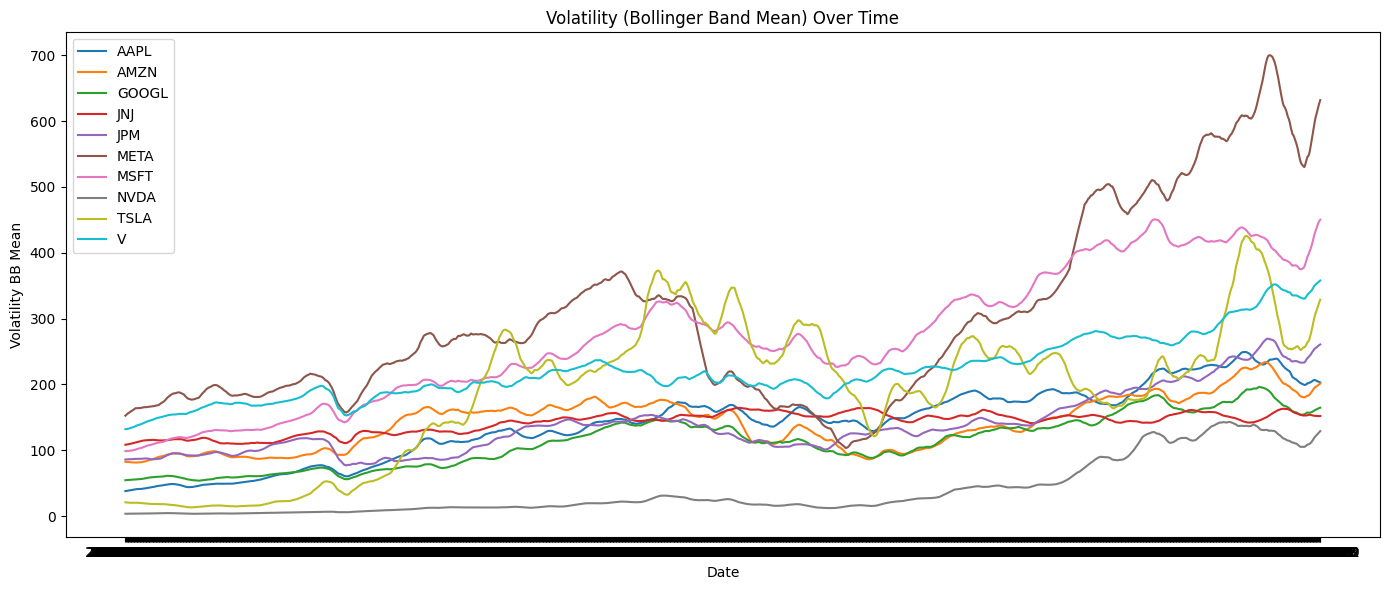

In [62]:
plt.figure(figsize=(14, 6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Mont'], subset['volatility_bbm'], label=ticker)
plt.title("Volatility (Bollinger Band Mean) Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility BB Mean")
plt.legend()
plt.tight_layout()
plt.show()


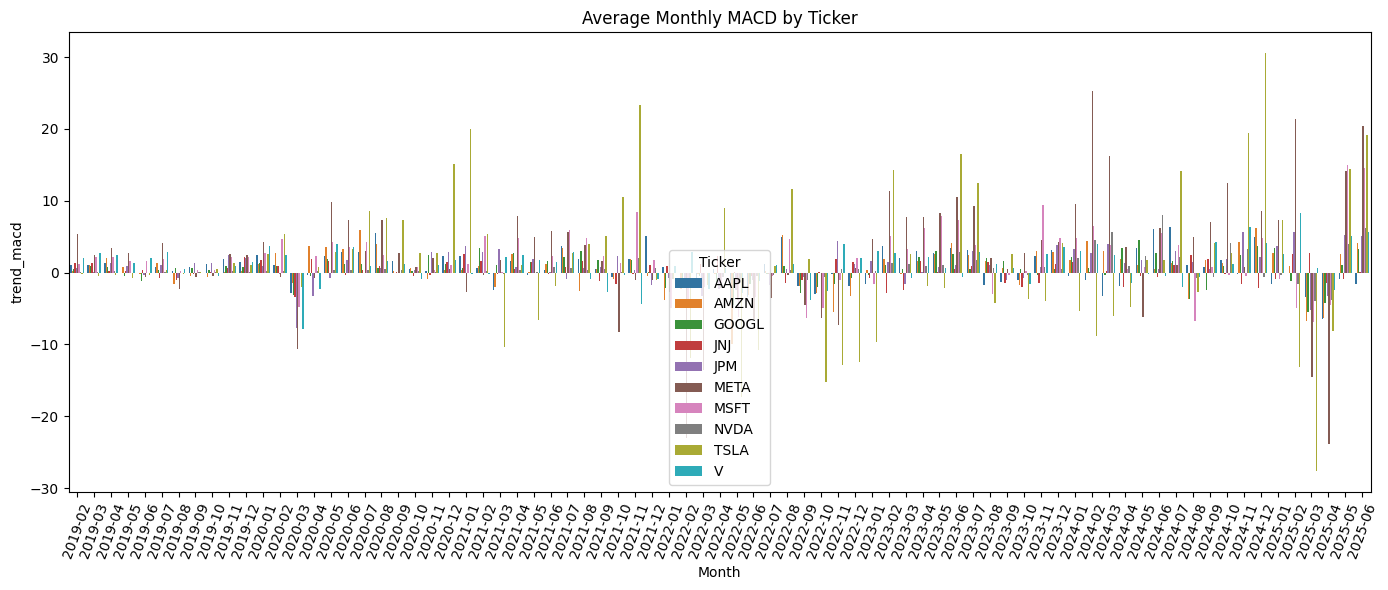

In [19]:
macd_month = df.groupby(['Month', 'Ticker'])['trend_macd'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=macd_month, x='Month', y='trend_macd', hue='Ticker')
plt.xticks(rotation=70)
plt.title("Average Monthly MACD by Ticker")
plt.tight_layout()
plt.show()


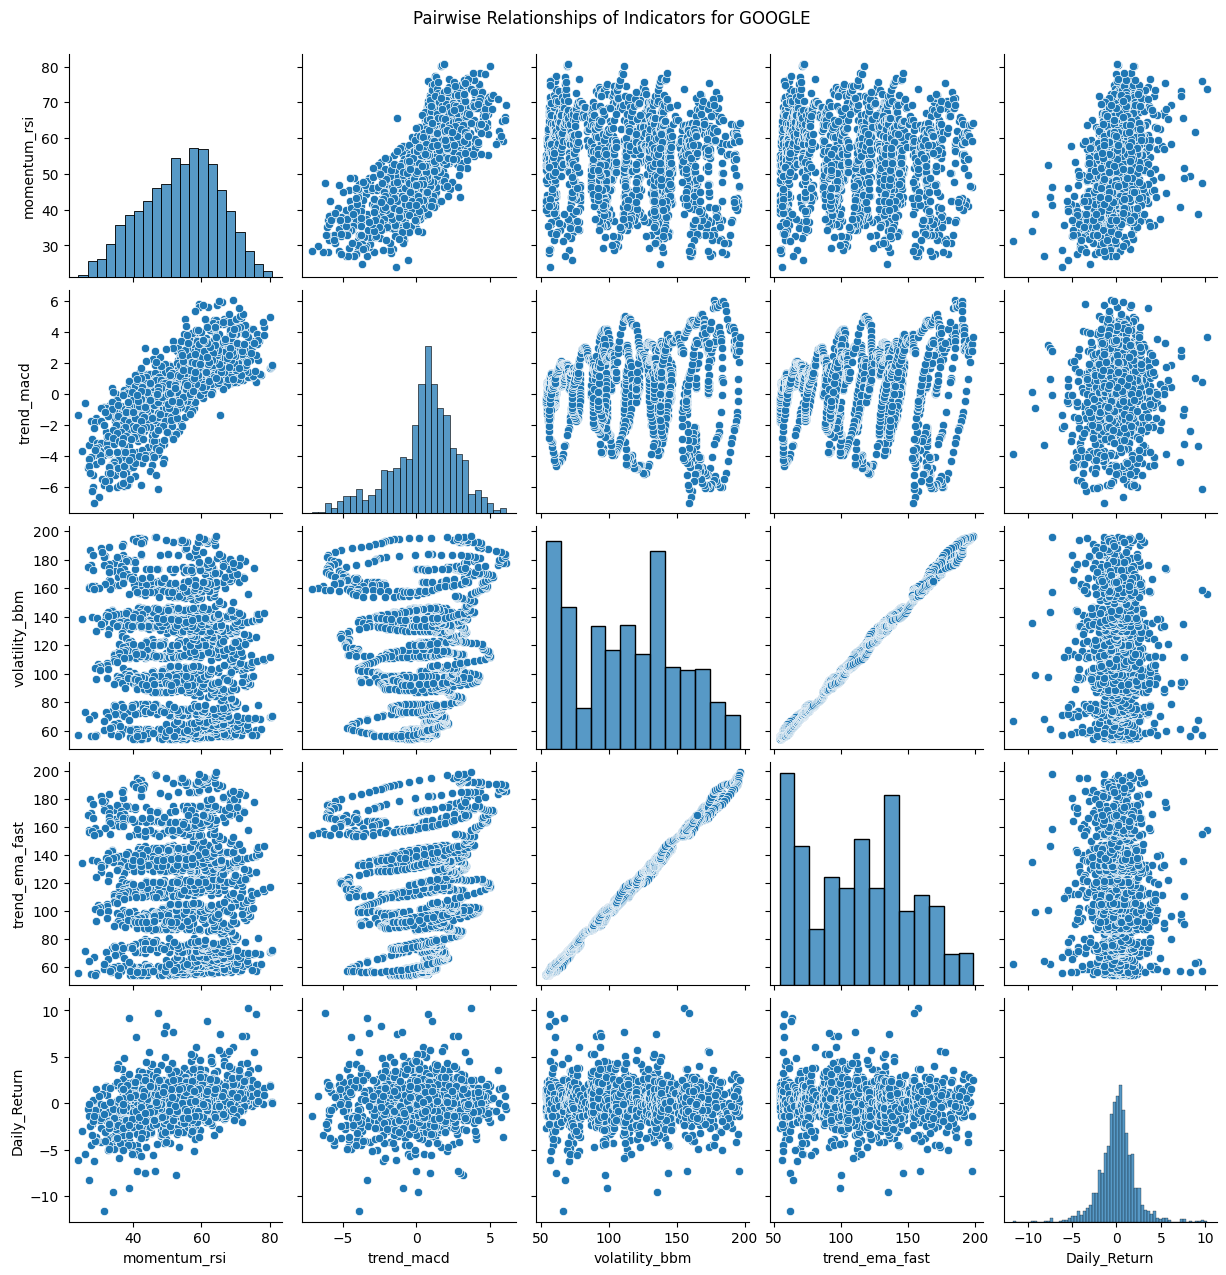

In [22]:
sns.pairplot(df[df['Ticker'] == 'GOOGL'][['momentum_rsi', 'trend_macd', 'volatility_bbm', 'trend_ema_fast', 'Daily_Return']])
plt.suptitle("Pairwise Relationships of Indicators for GOOGLE", y=1.02)
plt.show()


In [24]:
import altair as alt

df_alt = df[df['Ticker'] == 'TSLA'][['Date', 'Daily_Return', 'momentum_rsi']]
df_alt = df_alt.dropna()

alt_chart = alt.Chart(df_alt).transform_fold(
    ['Daily_Return', 'momentum_rsi'],
    as_=['Metric', 'Value']
).mark_line().encode(
    x='Date:T',
    y='Value:Q',
    color='Metric:N',
    tooltip=['Date:T', 'Metric:N', 'Value:Q']
).interactive().properties(
    title='TSLA - Daily Return and RSI Trends'
)

alt_chart.show()


alt.Chart(...)

In [30]:
df['Ticker'] = df['Ticker'].astype(str)


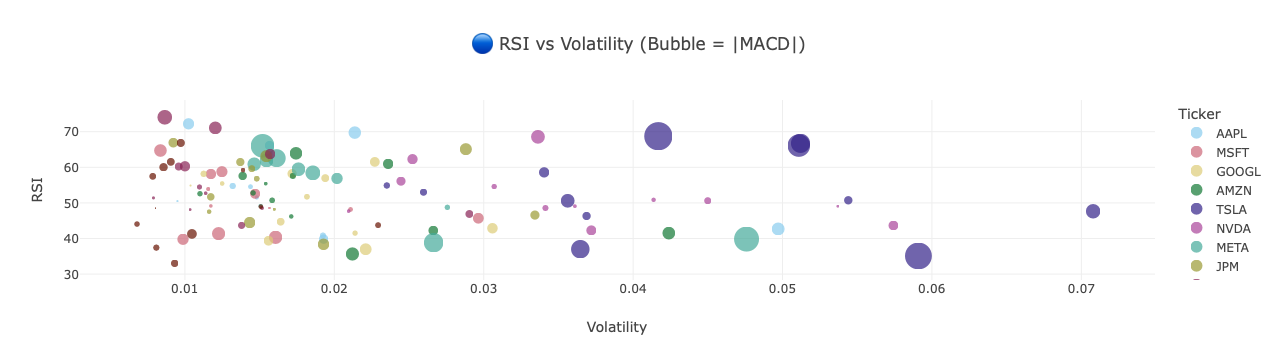

In [31]:
import plotly.express as px

fig = px.scatter(df,
                 x='Volatility',
                 y='momentum_rsi',
                 size=df['trend_macd'].abs(),
                 color='Ticker',
                 color_discrete_sequence=px.colors.qualitative.Safe,
                 hover_data=['Month'],
                 title='🔵 RSI vs Volatility (Bubble = |MACD|)')
fig.update_layout(xaxis_title='Volatility', yaxis_title='RSI')
fig.show()


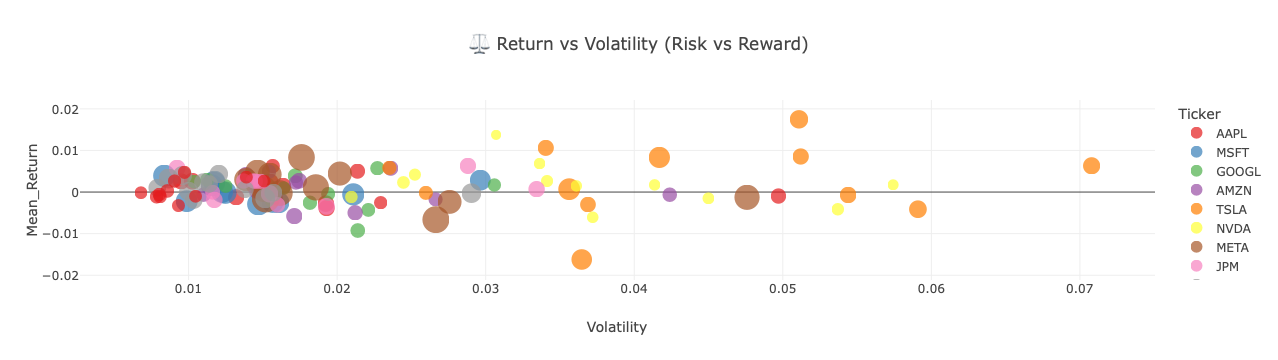

In [37]:
fig = px.scatter(
    df,
    x='Volatility',
    y='Mean_Return',
    color='Ticker',
    size='trend_ema_fast',
    hover_data=['Month'],
    title='⚖️ Return vs Volatility (Risk vs Reward)',
    color_discrete_sequence=px.colors.qualitative.Set1  # or 'Set2', 'Bold', etc.
)
fig.show()

In [40]:
print(df.columns.tolist())


['Month', 'Mean_Return', 'Min_Return', 'Max_Return', 'Volatility', 'Ticker', 'Month_Num', 'Year', 'Volatility_Level', 'Prev_Month_Return', 'momentum_rsi', 'trend_macd', 'volatility_bbm', 'trend_ema_fast']


In [41]:
# Load daily dataset (not the monthly-aggregated one)
df_daily = pd.read_csv("cleaned_5yr_stock_data.csv", parse_dates=['Date'])


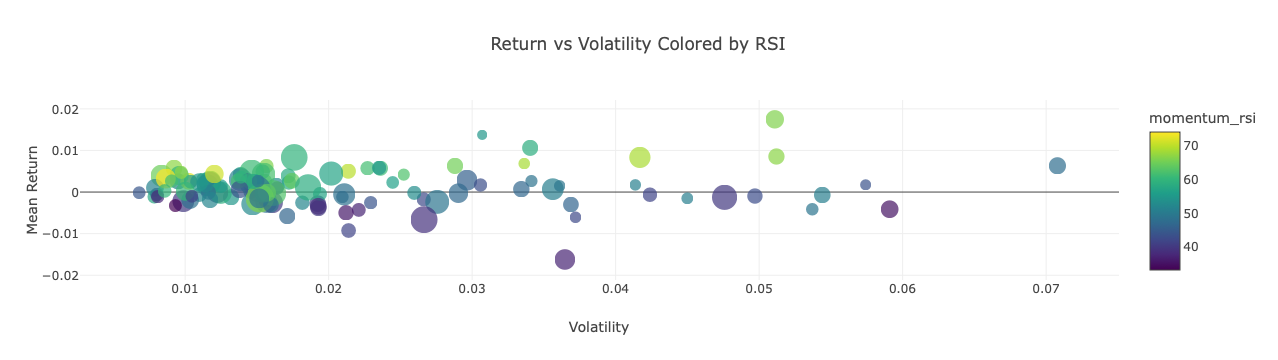

In [45]:
fig = px.scatter(df,
                 x='Volatility',
                 y='Mean_Return',
                 color='momentum_rsi',  # Use a continuous color scale
                 size='trend_ema_fast',
                 hover_data=['Month', 'Ticker'],
                 color_continuous_scale='Viridis',
                 title='Return vs Volatility Colored by RSI')

fig.update_layout(xaxis_title='Volatility', yaxis_title='Mean Return')
fig.show()


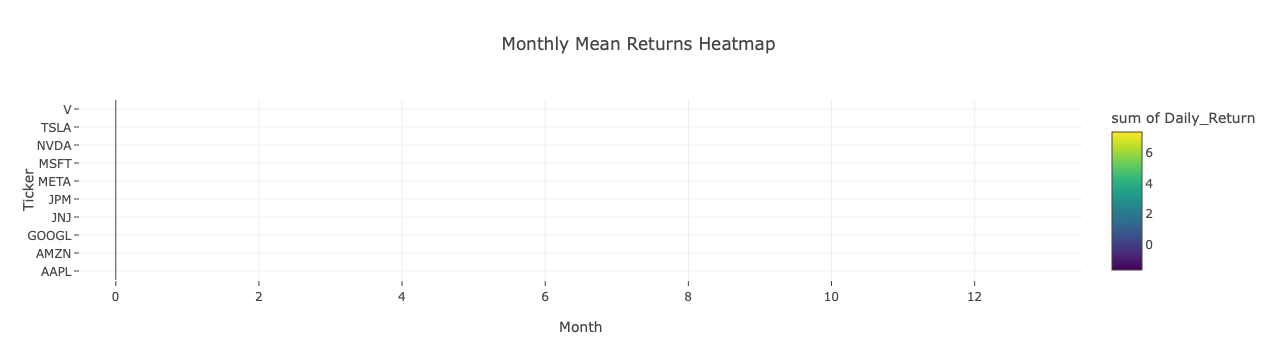

In [48]:
df = pd.read_csv("cleaned_5yr_stock_data_with_month.csv", parse_dates=["Month"])
df.head()


heatmap_df = df.groupby(['Ticker', 'Month'])['Daily_Return'].mean().reset_index()
heatmap_df['Month'] = pd.to_datetime(heatmap_df['Month'].astype(str))
heatmap_df['Month_Num'] = heatmap_df['Month'].dt.month

fig = px.density_heatmap(heatmap_df, x='Month_Num', y='Ticker', z='Daily_Return',
                         color_continuous_scale='Viridis', title='Monthly Mean Returns Heatmap')
fig.update_layout(xaxis_title='Month', yaxis_title='Ticker')
fig.show()


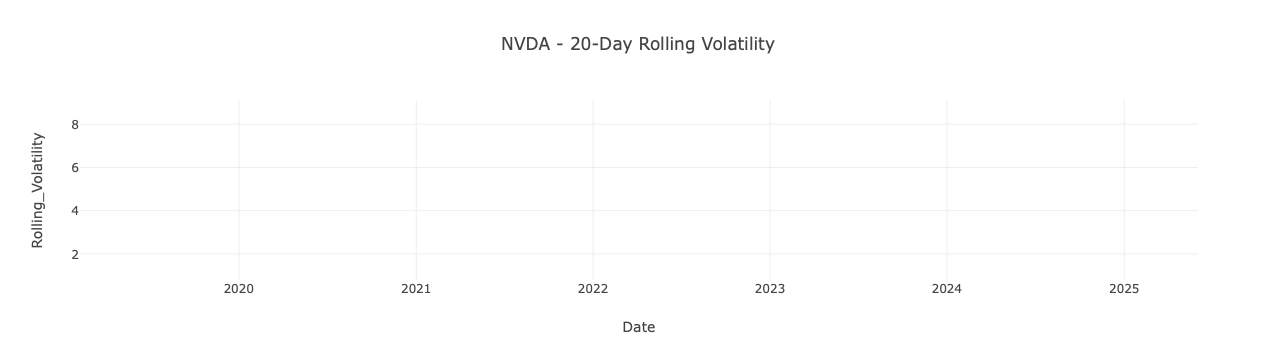

In [50]:
df['Rolling_Volatility'] = df.groupby('Ticker')['Daily_Return'].transform(lambda x: x.rolling(20).std())

fig = px.line(df[df['Ticker'] == 'NVDA'], x='Date', y='Rolling_Volatility',
              title='NVDA - 20-Day Rolling Volatility')
fig.show()



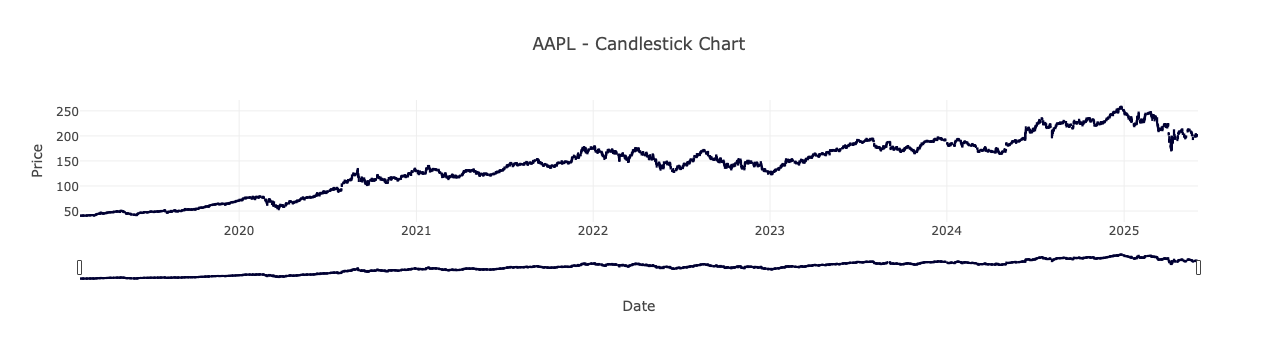

In [51]:
ticker = 'AAPL'
df_ticker = df[df['Ticker'] == ticker]

fig = go.Figure(data=[go.Candlestick(
    x=df_ticker['Date'],
    open=df_ticker['Open'],
    high=df_ticker['High'],
    low=df_ticker['Low'],
    close=df_ticker['Close'],
    name=ticker
)])
fig.update_layout(title=f'{ticker} - Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

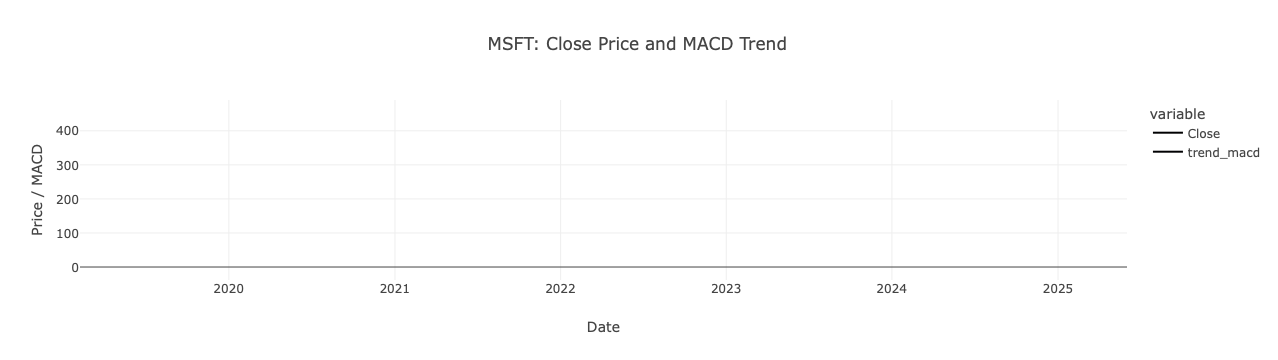

In [52]:
import plotly.express as px

fig = px.line(df[df['Ticker'] == 'MSFT'], x='Date', y=['Close', 'trend_macd'],
              labels={'value': 'Price / MACD'}, title='MSFT: Close Price and MACD Trend')
fig.show()
print(df['Ticker'].unique())


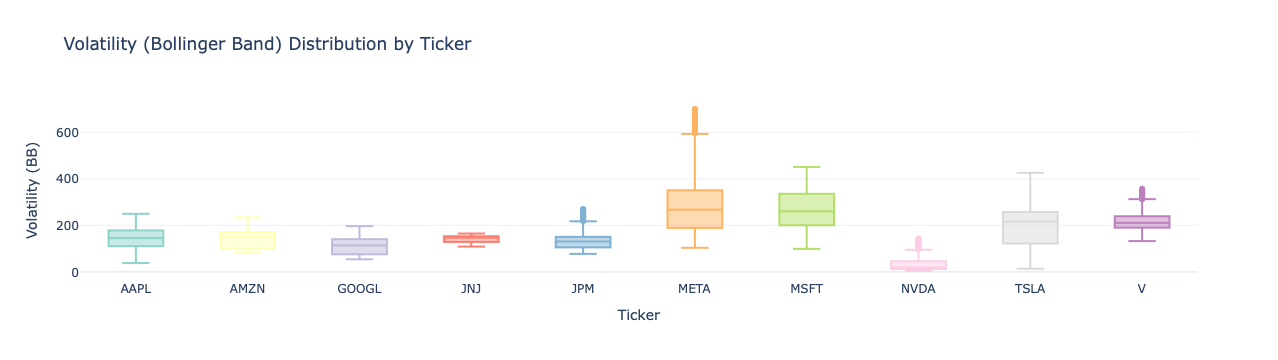

In [55]:
import plotly.express as px

fig = px.box(
    df,
    x='Ticker',
    y='volatility_bbm',
    color='Ticker',
    color_discrete_sequence=px.colors.qualitative.Set3,  # You can also try Set1, Plotly, Pastel
    title='Volatility (Bollinger Band) Distribution by Ticker'
)

fig.update_layout(
    template='plotly_white',  # cleaner background
    xaxis_title='Ticker',
    yaxis_title='Volatility (BB)',
    showlegend=False  # optional, since each box is already labeled
)

fig.show()
print(df.columns.tolist())



In [57]:
print(df.columns.tolist())


['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker', 'momentum_rsi', 'trend_macd', 'volatility_bbm', 'trend_ema_fast', 'Daily_Return', 'Month', 'Rolling_Volatility']


In [58]:
avg_monthly_return = df.groupby('Ticker')['Daily_Return'].mean().reset_index()
avg_monthly_return.rename(columns={'Daily_Return': 'Avg_Monthly_Return'}, inplace=True)


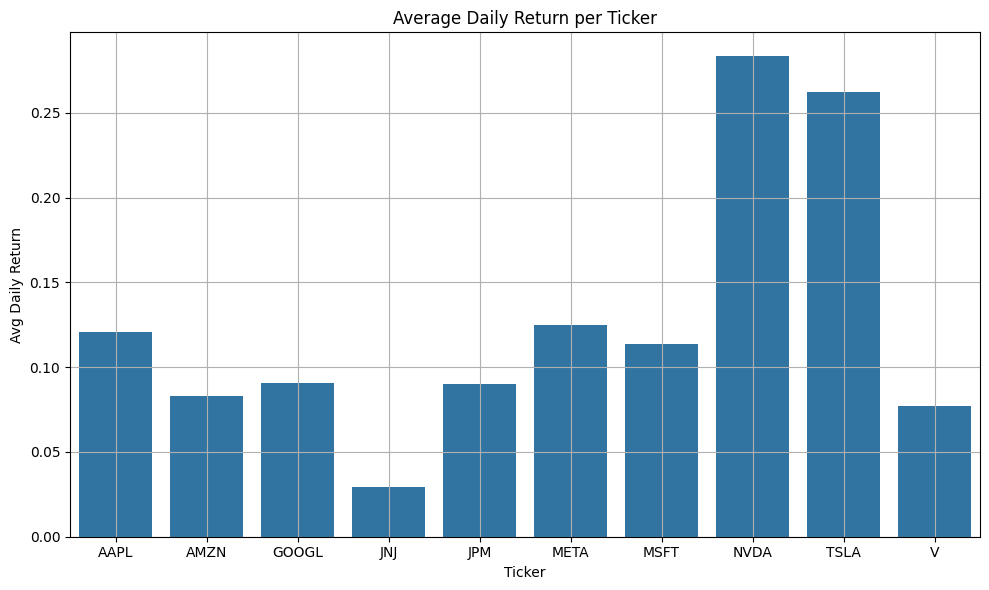

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_monthly_return, x='Ticker', y='Avg_Monthly_Return', errorbar=None)
plt.title('Average Daily Return per Ticker')
plt.ylabel('Avg Daily Return')
plt.xlabel('Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()
